# 보스턴 집값 예측하기

-  데이터셋 저장소 : https://archive.ics.uci.edu/dataset/186/wine+quality (캘리포니아 어바인 대학 머신러닝 저장소)

        - CRIM: 지역별 범죄 발생률
        - ZN: 25,000평방피트를 초과하는 거주 지역의 비율
        - INDUS: 비상업 지역 넓이 비율
        - CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
        - NOX: 일산화질소 농도
        - RM: 거주할 수 있는 방 개수
        - AGE: 1940년 이전에 건축된 소유 주택의 비율
        - DIS: 5개 주요 고용센터까지의 가중 거리
        - RAD: 고속도로 접근 용이도
        - TAX: 10,000달러당 재산세율
        - PTRATIO: 지역의 교사와 학생 수 비율
        - B: 지역의 흑인 거주 비율
        - LSTAT: 하위 계층의 비율
        - PRICE: 본인 소유의 주택 가격(중앙값) - 종속변수 (위의 건 독립변수)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

#한글 표기 설정
from matplotlib import rc, font_manager
fontname='c:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=fontname).get_name()
rc('font',family=font_name)

#축에 마이너스 표기
plt.rcParams['axes.unicode_minus']=False

#그래프 사이즈 설정
plt.rcParams['figure.figsize']=(5,4)

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [23]:
df= pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

# 요약통계
    1. chas 에 따른 집가격(target)의 평균, 표준편차, 중앙값을 구하라.
    2. 선형회귀분석 모델을 생성하고, 모델을 사용하여 예측값을 구하라.
    3. 새로운 데이터 2개를 사용하여 예측값을 구하라.
    4. 부분회귀분석 시각화를 작성하여 돌립변수들이 종속변수에 미치는 영향을 분석하라.
        - 1개 독립변수 분석(plot_partregress)은 (CRIM)으로 한다.
        - plot_partregress_grid() 작성

In [24]:
df['TARGET']=target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


1. chas 에 따른 집가격(target)의 평균, 표준편차, 중앙값을 구하라.
    

In [25]:
df.groupby(['CHAS']).agg({'TARGET':['mean','std','median']})

TARGET                  
           mean        std median
CHAS                             
0.0   22.093843   8.831362   20.9
1.0   28.440000  11.816643   23.3

2. 선형회귀분석 모델을 생성하고, 모델을 사용하여 예측값을 구하라.
   

In [26]:
from statsmodels.formula.api import ols, glm
Rformula = 'TARGET ~ CRIM + ZN + INDUS + \
      CHAS + NOX + RM + AGE + \
      DIS + RAD + TAX + PTRATIO+B+LSTAT'

regression_result=ols(Rformula, data=df).fit()

In [27]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          6.72e-135
Time:                        13:38:16   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
sample1=df[df.columns.difference(['TARGET'])]
sample1[:5]
sample1_predict=regression_result.predict(sample1)

In [29]:
print(sample1_predict[100:105])
print(df['TARGET'][100:105])

100    24.580220
101    25.594135
102    19.790137
103    20.311671
104    21.434826
dtype: float64
100    27.5
101    26.5
102    18.6
103    19.3
104    20.1
Name: TARGET, dtype: float64


 3. 새로운 데이터 2개를 사용하여 예측값을 구하라.
   

In [32]:
data = {
    "CRIM" : [0.02729, 0.03237], 
    "ZN":[0.0	, 0.0],
    "INDUS":[7.07, 2.18], 
    "CHAS":[0.0, 0.0], 
    "NOX":[0.469, 0.458], 
    "RM":[7.185, 6.998], 
    "AGE":[61.1, 45.8], 
    "DIS":[4.9671, 6.0622], 
    "RAD":[2.0, 3.0], 
    "TAX":[242.0, 222.0],
    "PTRATIO":[17.8, 18.7],
    "B":[392.83, 394.63],
    "LSTAT":[4.03, 2.94]}
# "TARGET":[34.7,  33.4]

sample2=pd.DataFrame(data, columns=sample1.columns)

In [35]:
sample2_predict=regression_result.predict(sample2)
print(sample2_predict)

0    30.567597
1    28.607036
dtype: float64


 4. 부분회귀분석 시각화를 작성하여 돌립변수들이 종속변수에 미치는 영향을 분석하라.
    - 1개 독립변수 분석(plot_partregress)은 (CRIM)으로 한다.
    - plot_partregress_grid() 작성

In [37]:
import statsmodels.api as sm
sns.set_style('dark')

In [38]:
others=list(set(df.columns).difference(set(['TARGET','CRIM'])))

eval_env: 1


(<Figure size 500x400 with 1 Axes>,
 (array([ 2.02894528e+00,  1.72554915e+00,  3.17028464e+00,  3.27703139e+00,
          2.81091614e+00,  2.52722763e+00, -4.59346397e-01, -1.68368101e+00,
         -4.34881188e+00, -8.60602683e-01, -1.59977351e+00, -1.66230760e-01,
         -1.35751341e+00,  2.04577860e+00,  1.26534129e+00,  1.80216091e+00,
          2.66024754e+00,  2.60632332e-01, -4.02035431e-01,  6.42586087e-01,
         -1.35452622e+00,  3.89318138e-01, -3.09798152e-01, -8.87252802e-01,
         -2.29589952e-02, -9.13037285e-01,  2.50496297e-01, -8.05873765e-01,
          9.93024920e-01,  1.25827326e+00, -1.64348287e+00,  1.06320797e+00,
         -3.89121688e+00, -9.55801645e-01, -1.91329083e+00, -9.72014476e-01,
         -1.54117502e+00, -3.26688518e-01, -5.93143499e-01, -4.92106111e-01,
          2.16841068e-01,  2.78257634e+00,  2.34231025e+00,  2.09668642e+00,
          1.42163928e+00,  8.25775922e-01, -5.02194852e-02, -7.15800694e-01,
         -3.57771154e+00,  9.79165682e-0

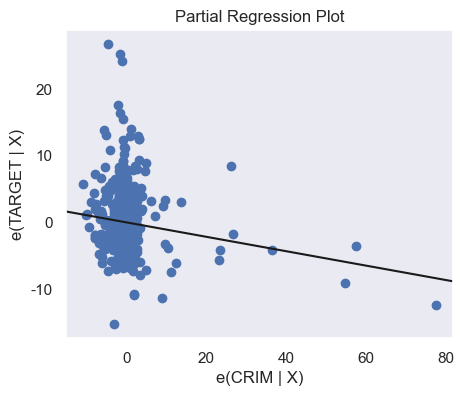

In [39]:
sm.graphics.plot_partregress('TARGET', 'CRIM', others, data=df, ret_coords=True, obs_labels=False)

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


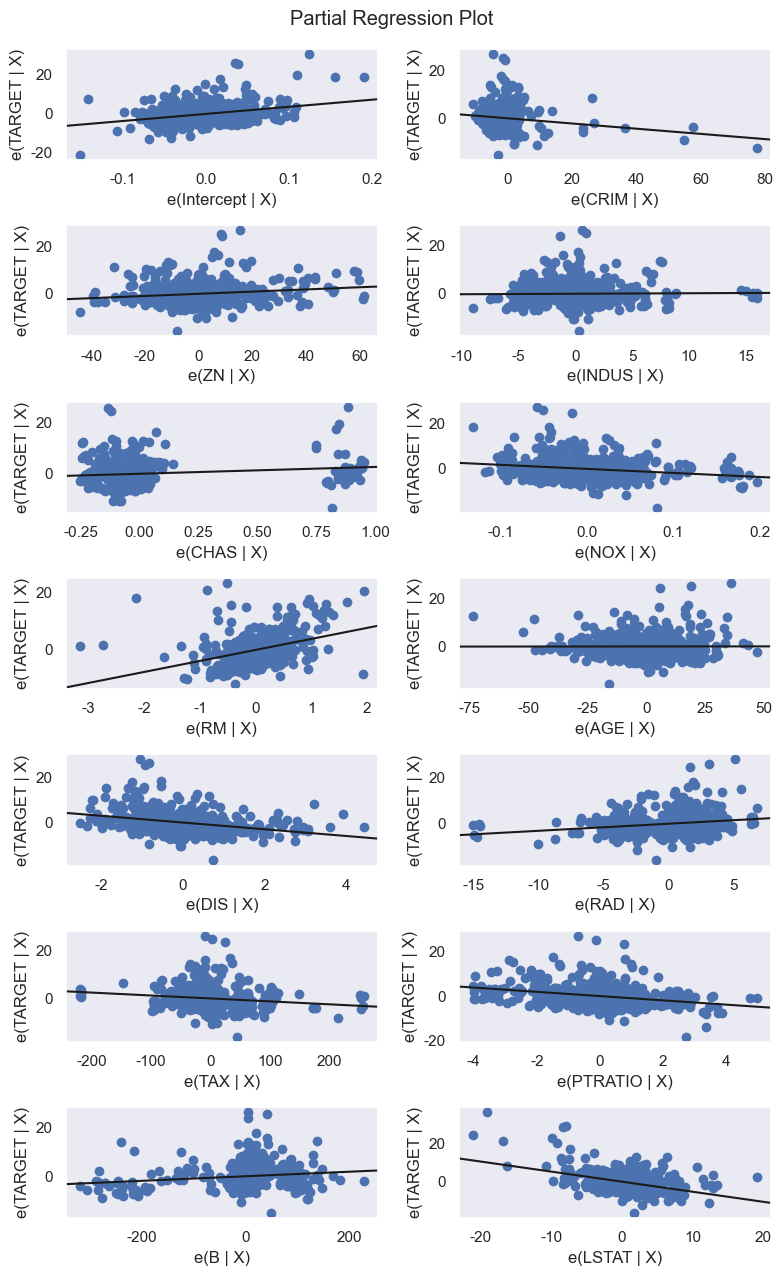

In [40]:
fig=plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()